Air is the simplest component of life. This is why we decided to use the simplest data on air quality to demonstrate how much information can be extracted from simple and narrow data using techniques of data visualisation.

We use AQI index to measure air quality. Higher AQI value corresponds to lower quality of air.

[Click to learn more about the AQI Index](https://en.wikipedia.org/wiki/Air_quality_index)

importing necessary libraries and uploading our data

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import arviz as az
from scipy.stats import norm

data = pd.read_csv("data_date.csv")
data

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
9989,2022-09-22,Uzbekistan,Moderate,66
9990,2022-09-22,Vatican,Good,30
9991,2022-09-22,Venezuela,Good,20
9992,2022-09-22,Vietnam,Moderate,76


We want to predict the status column of this dataset given the data on factors that affect the status of air

In [8]:
data = data.dropna()
data.isnull().sum()

data.describe()

,AQI Value
count,9994.000000
mean,60.795477
std,45.763604
min,1.000000
25%,29.000000
50%,52.000000
75%,82.000000
max,868.000000


Rename UK as it has a very long name in the dataset

In [9]:
data["Country"]= data["Country"].replace({'United Kingdom of Great Britain and Northern Ireland':"UK"})

Plotting the AQI value of countries and their status, given a date accesible by scrollbar

In [10]:
plt.figure(figsize=(18,18))
px_template = "presentation"


px.bar(data , x = "AQI Value" , y = "Country" , color = "Status" ,  animation_frame = "Date" , width=1200, height=1700)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Status=Good<br>Date=2022-07-21<br>AQI Value=%{x}<br>Country=%{y}<extra></extra>',
              'legendgroup': 'Good',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'Good',
              'offsetgroup': 'Good',
              'orientation': 'h',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([14, 45, 12, 13, 28, 12,  9, 15, 28, 15, 43,  6, 25, 33, 50, 36, 26, 15,
                          25, 13,  9, 41, 34, 38,  3,  7,  1, 47, 47, 30,  8, 14, 38, 29, 27, 40,
                          38, 42, 20, 23, 20, 32, 42, 30, 46, 42, 25, 16, 46, 42, 46, 15, 18, 26,
                           8, 14, 50, 33, 29, 49, 42, 38, 31, 20, 37,  3, 43, 39, 17, 48, 18, 12,
                          29,  9, 10, 15, 29, 15, 44,  8, 24, 34, 36, 25, 16, 25, 13,  5, 41, 34,
                          32,  3,  7,  1, 32,  9, 15, 30, 28, 28, 42, 45, 44, 30, 24,  8, 19, 29,
                          46, 38, 49, 36, 25, 18, 44, 40, 44, 36, 12, 30, 22,  6, 24, 50, 33, 21,
                          50, 45, 41, 32, 18, 26,  2, 41], dtype=int64),
              'xaxis': 'x',
              'y': array(['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belize', 'Bermuda',
                          'Bolivia', 'Brunei', 'Bulgaria', 'Cambodia', 'Cape Verde',
                          'Cayman Islands', 'Costa Rica', 'Croatia', 'Cyprus', 'Denmark',
                          'Dominican Republic', 'Estonia', 'Finland', 'French Guiana', 'Gambia',
                          'Georgia', 'Gibraltar', 'Greece', 'Grenada', 'Guadeloupe', 'Guam',
                          'Guatemala', 'Honduras', 'Hong Kong', 'Iceland', 'Ireland',
                          'Ivory Coast', 'Jersey', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan',
                          'Laos', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
                          'Macedonia', 'Madagascar', 'Martinique', 'Moldova', 'Monaco',
                          'Montenegro', 'Myanmar', 'New Caledonia', 'New Zealand', 'Portugal',
                          'Puerto Rico', 'Reunion', 'San Marino', 'Senegal', 'Singapore',
                          'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland', 'Trinidad and Tobago',
                          'Ukraine', 'Venezuela', 'Vietnam', 'Zambia', 'Albania', 'Austria',
                          'Azerbaijan', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brunei',
                          'Bulgaria', 'Cambodia', 'Cape Verde', 'Cayman Islands', 'Costa Rica',
                          'Croatia', 'Denmark', 'Dominican Republic', 'Estonia', 'Finland',
                          'French Guiana', 'Gambia', 'Georgia', 'Gibraltar', 'Greece', 'Grenada',
                          'Guadeloupe', 'Guam', 'Hong Kong', 'Iceland', 'Ireland', 'Ivory Coast',
                          'Jersey', 'Jordan', 'Kenya', 'Kosovo', 'Kyrgyzstan', 'Laos', 'Latvia',
                          'Liberia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao',
                          'Macedonia', 'Madagascar', 'Martinique', 'Moldova', 'Monaco',
                          'Mongolia', 'Montenegro', 'Myanmar', 'New Caledonia', 'New Zealand',
                          'Portugal', 'Puerto Rico', 'Reunion', 'San Marino', 'Senegal',
                          'Singapore', 'Slovenia', 'Sri Lanka', 'Sweden', 'Switzerland',
                          'Trinidad and Tobago', 'Ukraine', 'Venezuela', 'Vietnam'], dtype=object),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': ('Status=Moderate<br>Date=2022-0' ... 'br>Country=%{y}<extra></extra>'),
              'legendgroup': 'Moderate',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'Moderate',
              'offsetgroup': 'Moderate',
              'orientation': 'h',
              'sho

<Figure size 1800x1800 with 0 Axes>

Plotting the variations in AQI index for countries to observe which countries experience the highest AQI variations per date.

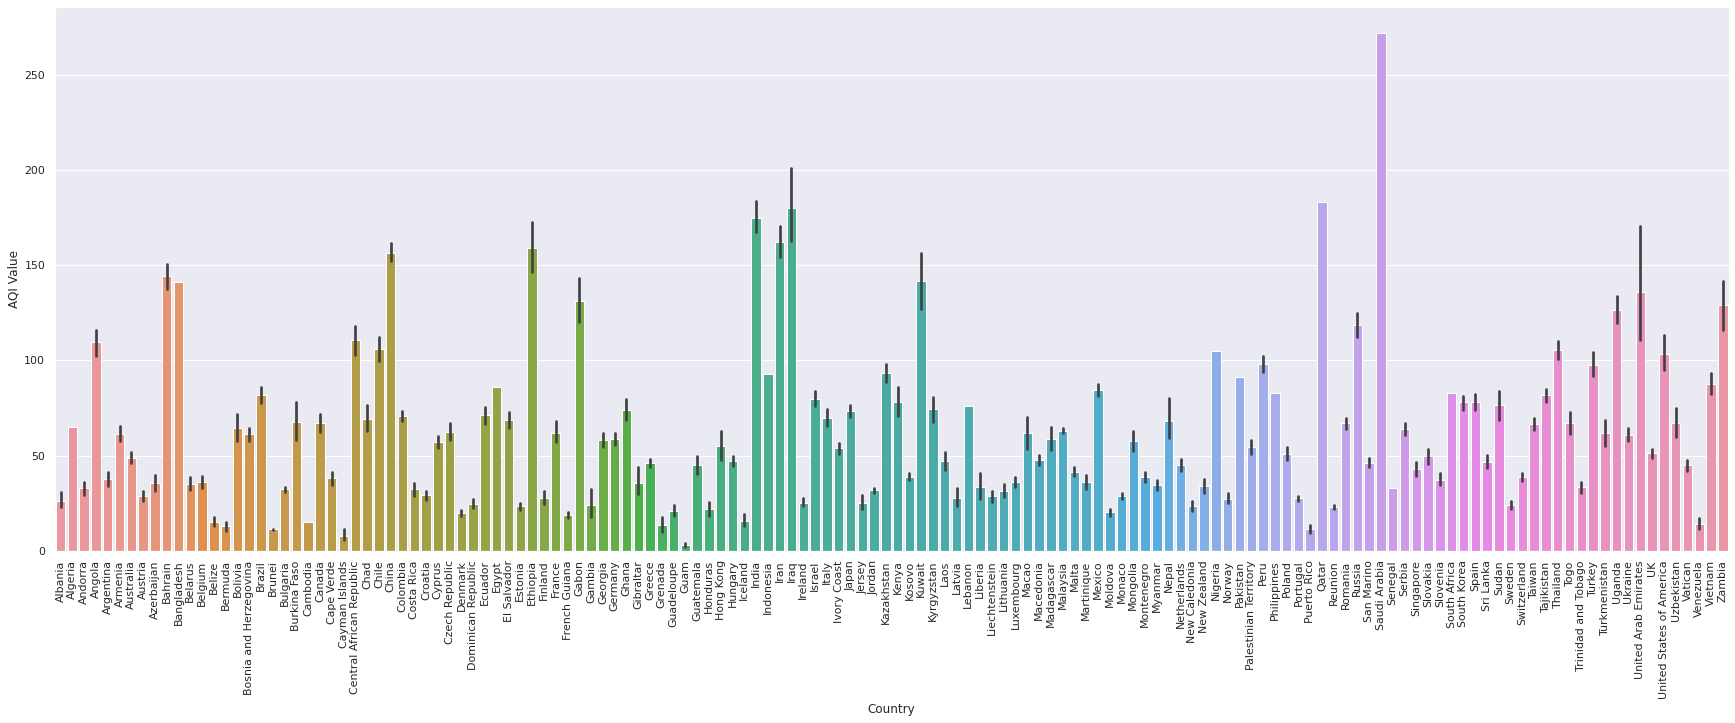

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='Country',y='AQI Value',data=data);

Classifying countries by air quality using px.choropleth:
https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html

In [12]:
map = px.choropleth(data,locations = "Country", locationmode='country names', color="Status", animation_frame="Date",range_color= [25,500])
map.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Plotting the global number of status observations for each status:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Air quality status count')

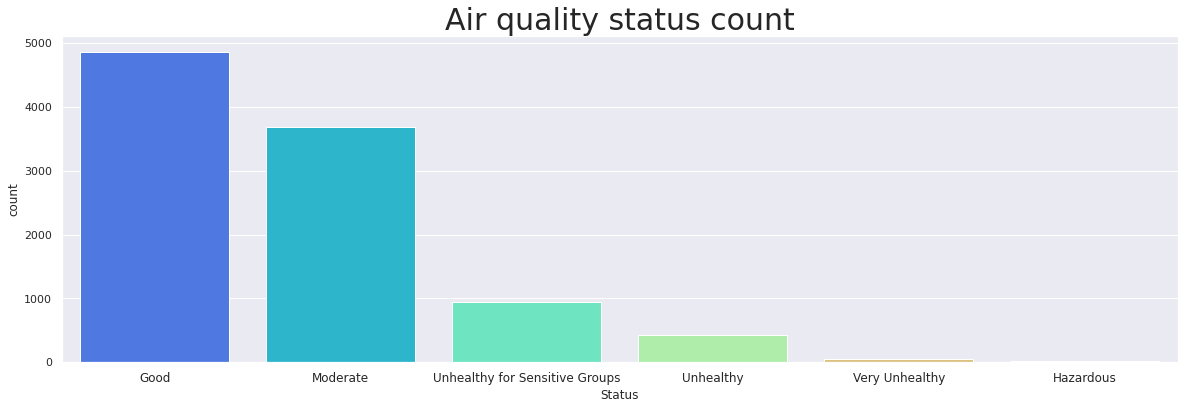

In [ ]:
sns.set(rc={'figure.figsize':(20,6)})
plt.xticks(fontsize=12)
p=sns.countplot(data['Status'],order=data.Status.value_counts().sort_values(ascending=False).index,palette='rainbow')
p.axes.set_title("Air quality status count",fontsize=30)

Text(0.5, 1.0, 'AQI Values Distribution')

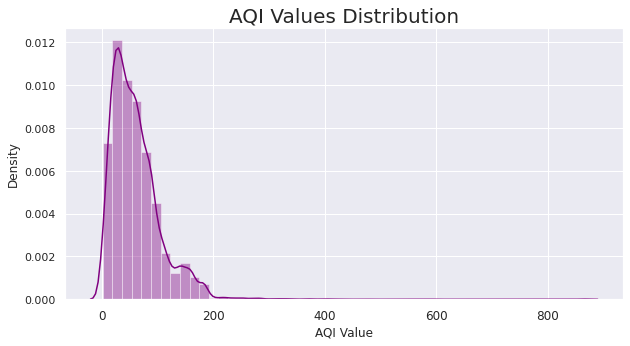

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(data['AQI Value'],color='Purple')
p.axes.set_title("AQI Values Distribution",fontsize=20)

Plotting the probabilities of observing a given AQI value based on our observations

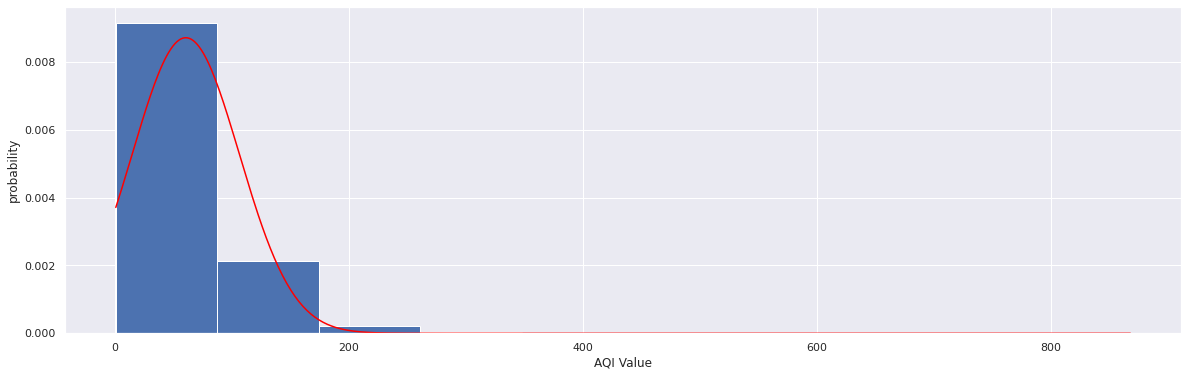

In [ ]:
data_per_mean = data.groupby(['AQI Value']).mean()
mean, std = data['AQI Value'].mean(), data['AQI Value'].std() 

xs = np.linspace(data_per_mean.index.min(), data_per_mean.index.max(), 500)
ys = norm.pdf(xs, mean, std)

plt.hist(data['AQI Value'], density=True)
plt.xlabel('AQI Value')
plt.ylabel('probability')
plt.plot(xs, ys, color='red')

plt.show()

**I DONT THINK THIS IS CORRECT! WE ONLY HAVE AQI INDEX AND STATUS I AM CONFUSED**

In [ ]:
#t test between all countries and "green" countiures :  Norway, denmark,Sweden,finland, singapore, japan, germany,switzerland, south korea, Australia
import scipy.stats as stats
green_country = data[data['Country'].isin(['Norway', 'Denmark','Sweden','Finland','Singapore','Japan','Australia','Switzerland','Germany','South Korea']) ].reset_index()
green_list =  list(green_country["AQI Value"])
data_list =  list(data["AQI Value"])
#As a rule of thumb, we can assume the populations have equal variances if the ratio of the larger sample variance to the smaller sample variance is less than 4:1. 
print(1/np.var(green_list)/np.var(data_list))
#Since the ratio is greater than 4:1, we can't assume equal variances
stats.ttest_ind(green_list, data_list, equal_var= False)


8.904524473798878e-07


Ttest_indResult(statistic=-17.179245866903898, pvalue=4.680776797616535e-59)

We’ll explore the problem of estimating probabilities from data in a Bayesian framework

assumptions:
-Our initial (prior) belief is each country has equal  AQI value.
-Treat each observation of one country as an independent trial

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
AQI Value[0],0.44,0.16,0.17,0.74,0.01,0.0,585.97,420.16,1.00
AQI Value[1],0.34,0.16,0.08,0.64,0.01,0.0,556.86,338.32,1.01
AQI Value[2],0.22,0.13,0.02,0.45,0.00,0.0,685.48,335.96,1.00


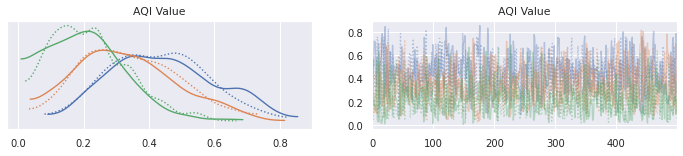

In [ ]:
alphas = np.array([1, 1, 1])
c= np.array([3, 2, 1])
with pm.Model() as model:

    # Parameters of the Multinomial are from a Dirichlet
    parameters = pm.Dirichlet('AQI Value', a=alphas, shape=3)
    # Observed data is from a Multinomial distribution

    observed_data=data.loc[data['Country'].isin(['Netherlands', 'China', 'Mexico'])]
    observed_data = pm.Multinomial(
        'observed_data', n=6, p=parameters, shape=3, observed=c)   
    
    trace = pm.sample(500, return_inferencedata=False)
    display(az.summary(trace, round_to=2))
    az.plot_trace(trace);

  